In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
# dengan menggunakan dataset paling umum dan terkemuka yaitu MNIST
mnist = tf.keras.datasets.mnist

In [4]:
# load data dan gunakan pada xtrain dan ytrain
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# mengatur 28*28 baris dan kolom
rows, cols = 28, 28

In [6]:
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

In [7]:
input_shape = (rows, cols, 1)

In [8]:
#normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
#onehot necode
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
def build_lenet(input_shape):
    model = tf.keras.Sequential()
    # filter konvolusi seperti yang kita ketahui adalah 6. ukuran filter adalah 
    # 5 x 5, tanh adalah fungsi aktivasi. 28x28 adalah dimensinya
    model.add(tf.keras.layers.Conv2D(filters=6,
                                     kernel_size = (5,5),
                                     strides = (1,1),
                                     activation = 'tanh',
                                     input_shape = input_shape))
    # subsampling hanyalah pengumpulan rata-rata maka gunakan avg_pool
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                               strides = (2,2)))
    model.add(tf.keras.layers.Conv2D(filters = 16,
                                     kernel_size = (5,5),
                                     strides =  (1,1),
                                     activation = 'tanh'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                               strides = (2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 120,
                                    activation = 'tanh'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 84,
                                      activation = 'tanh'))
    model.add(tf.keras.layers.Dense(units = 10,
                                    activation = 'softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer = tf.keras.optimizers.SGD(lr = 0.1,momentum = 0.0,decay = 0.0),
                  metrics = ['accuracy'])
    return model

In [11]:
lenet = build_lenet(input_shape)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
epochs = 10

In [13]:
history = lenet.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 128,
                    verbose = 1)

Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 0.4040 - accuracy: 0.8877
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1613 - accuracy: 0.9524
Epoch 3/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1083 - accuracy: 0.9684
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0835 - accuracy: 0.9752
Epoch 5/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0583 - accuracy: 0.9825
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0518 - accuracy: 0.9844
Epoch 8/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0459 - accuracy: 0.9861
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0414 - accuracy: 0.9873
Epoch 10/10
469/469 [==============================] - 19s 41ms/step - loss: 0.037

In [14]:
loss, acc = (lenet.evaluate(x_test, y_test))
print('Accuracy: ', acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0363 - accuracy: 0.9880
Accuracy:  0.9879999756813049


In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
print('Training Data ', x_train.shape, y_train.shape)

Training Data  (60000, 28, 28) (60000, 10)


In [16]:
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print('Training Data ', x_test.shape, y_test.shape)

Training Data  (10000, 28, 28) (10000, 10)


In [17]:
image_index = 4444

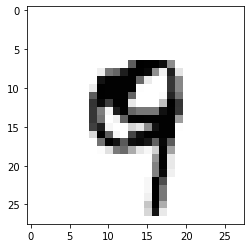

In [18]:
plt.imshow(x_test[image_index].reshape(28, 28), cmap= 'Greys')

In [19]:
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))

In [20]:
print(pred.argmax())

9
